In [2]:
import pandas as pd

In [10]:
students = pd.read_csv("StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## predicting gender

### Set up the model

In [11]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [12]:
from sklearn import tree 
import graphviz

def plot_tree_classification(model, features, class_names) :
    dot_data = tree.export_graphviz(model, out_file=None,
                                   feature_names=features,
                                   class_names=class_names,
                                   filled=True, rounded=True,
                                   special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

In [13]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

### Test/train split

In [14]:
from sklearn.model_selection import train_test_split as tts

In [16]:
student_train, student_test = tts(students, test_size = 0.3, stratify=students['gender'], random_state = 44)
print (student_train.shape, student_test.shape)

(700, 8) (300, 8)


In [23]:
features = ['math score', 'reading score']
dt = dtc(max_depth=3)
dt.fit(student_train[features], student_train['gender'])

DecisionTreeClassifier(max_depth=3)

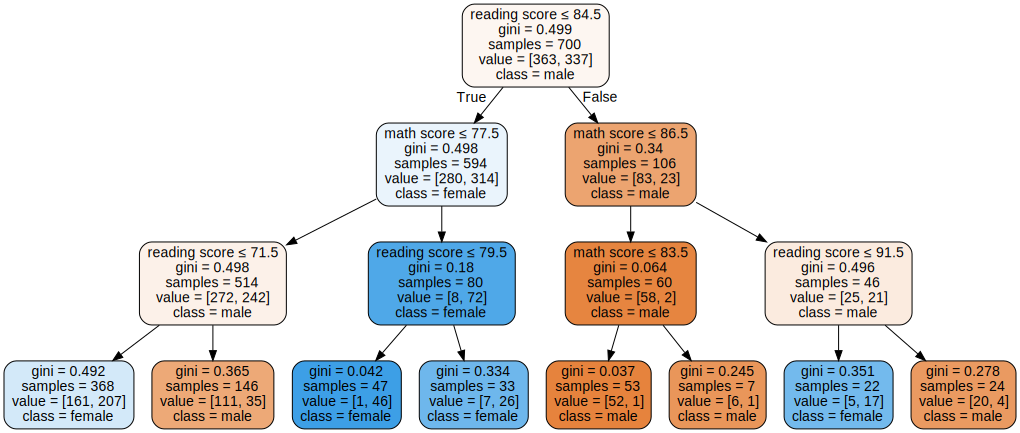

In [24]:
plot_tree_classification(dt, features, student_test.gender.unique())

In [25]:
predictOnTrainSet = dt.predict(student_train[features])
predictOnTestSet = dt.predict(student_test[features])

accuracyTrain = calculate_accuracy(predictOnTrainSet, student_train.gender)
accuracyTest = calculate_accuracy(predictOnTestSet, student_test.gender)

print("Accuracy on training set: " + str(accuracyTrain))
print("Accuracy on test set: " + str(accuracyTest))

Accuracy on training set: 0.6928571428571428
Accuracy on test set: 0.7166666666666667


## writing score regression

In [26]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
        
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [31]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    dot_data = tree.export_graphviz(model, out_file=None,
                          feature_names = features,
                          filled=True, rounded=True,
                          special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

In [29]:
from sklearn.tree import DecisionTreeRegressor as dtr

### training the model

In [30]:
features = ["math score", 'reading score']
dt = dtr(max_depth = 3)
dt.fit(student_train[features], student_train['writing score'])

DecisionTreeRegressor(max_depth=3)

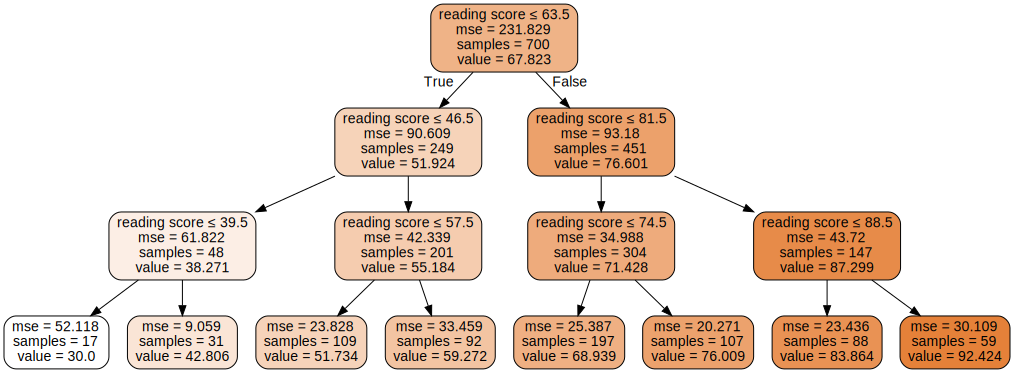

In [34]:
plot_tree_regression(dt, features)

In [39]:
predictionsOnTrainSet = dt.predict(student_train[features])
predictionsOnTestSet = dt.predict(student_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainSet, student_train['writing score'])
rmseTest = calculate_rmse(predictionsOnTestSet, student_test['writing score'])

print('RMSE on training set ' + str(rmseTrain))
print('RMSE on test set ' + str(rmseTest))

RMSE on training set 5.049944800384248
RMSE on test set 5.324967030903762
